## Análise de séries temporais

Este notebook busca uma série temporal de um arquivo escolhido e faz algumas análises preliminares.

Data da última atualização: 10/02/2025

#### Preliminares

In [1]:
# Carregamento das bibliotecas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# Ajuste das preferências gráficas

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#FFFFFF',    # Cor da moldura
    'axes.facecolor': '#FFFFFF',      # Cor do fundo
    'savefig.facecolor':'#000000',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': True,
    'grid.color': '#888888',
    'grid.linewidth': '0.1',
    'text.color': '#000000',
    'axes.labelcolor': '#000000',
    'xtick.color': '#000000',
    'ytick.color': '#000000',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (21,13)

#### Carregamento da Série Temporal

In [3]:
# Leitura do arquivo de dados

MinhaSerieTemporal = pd.read_csv('HistoricoVendasPadaria.csv', index_col = 0)

In [4]:
# Exibição do DataFrame

MinhaSerieTemporal

,Vendas
Data,
2024-02-04,52
2024-02-05,20
2024-02-06,34
2024-02-07,31
2024-02-08,36
...,...
2025-01-28,31
2025-01-29,31
2025-01-30,41


In [5]:
# Ajuste do índice para formato DateTime

MinhaSerieTemporal.index = pd.to_datetime(MinhaSerieTemporal.index)

<Axes: xlabel='Data'>

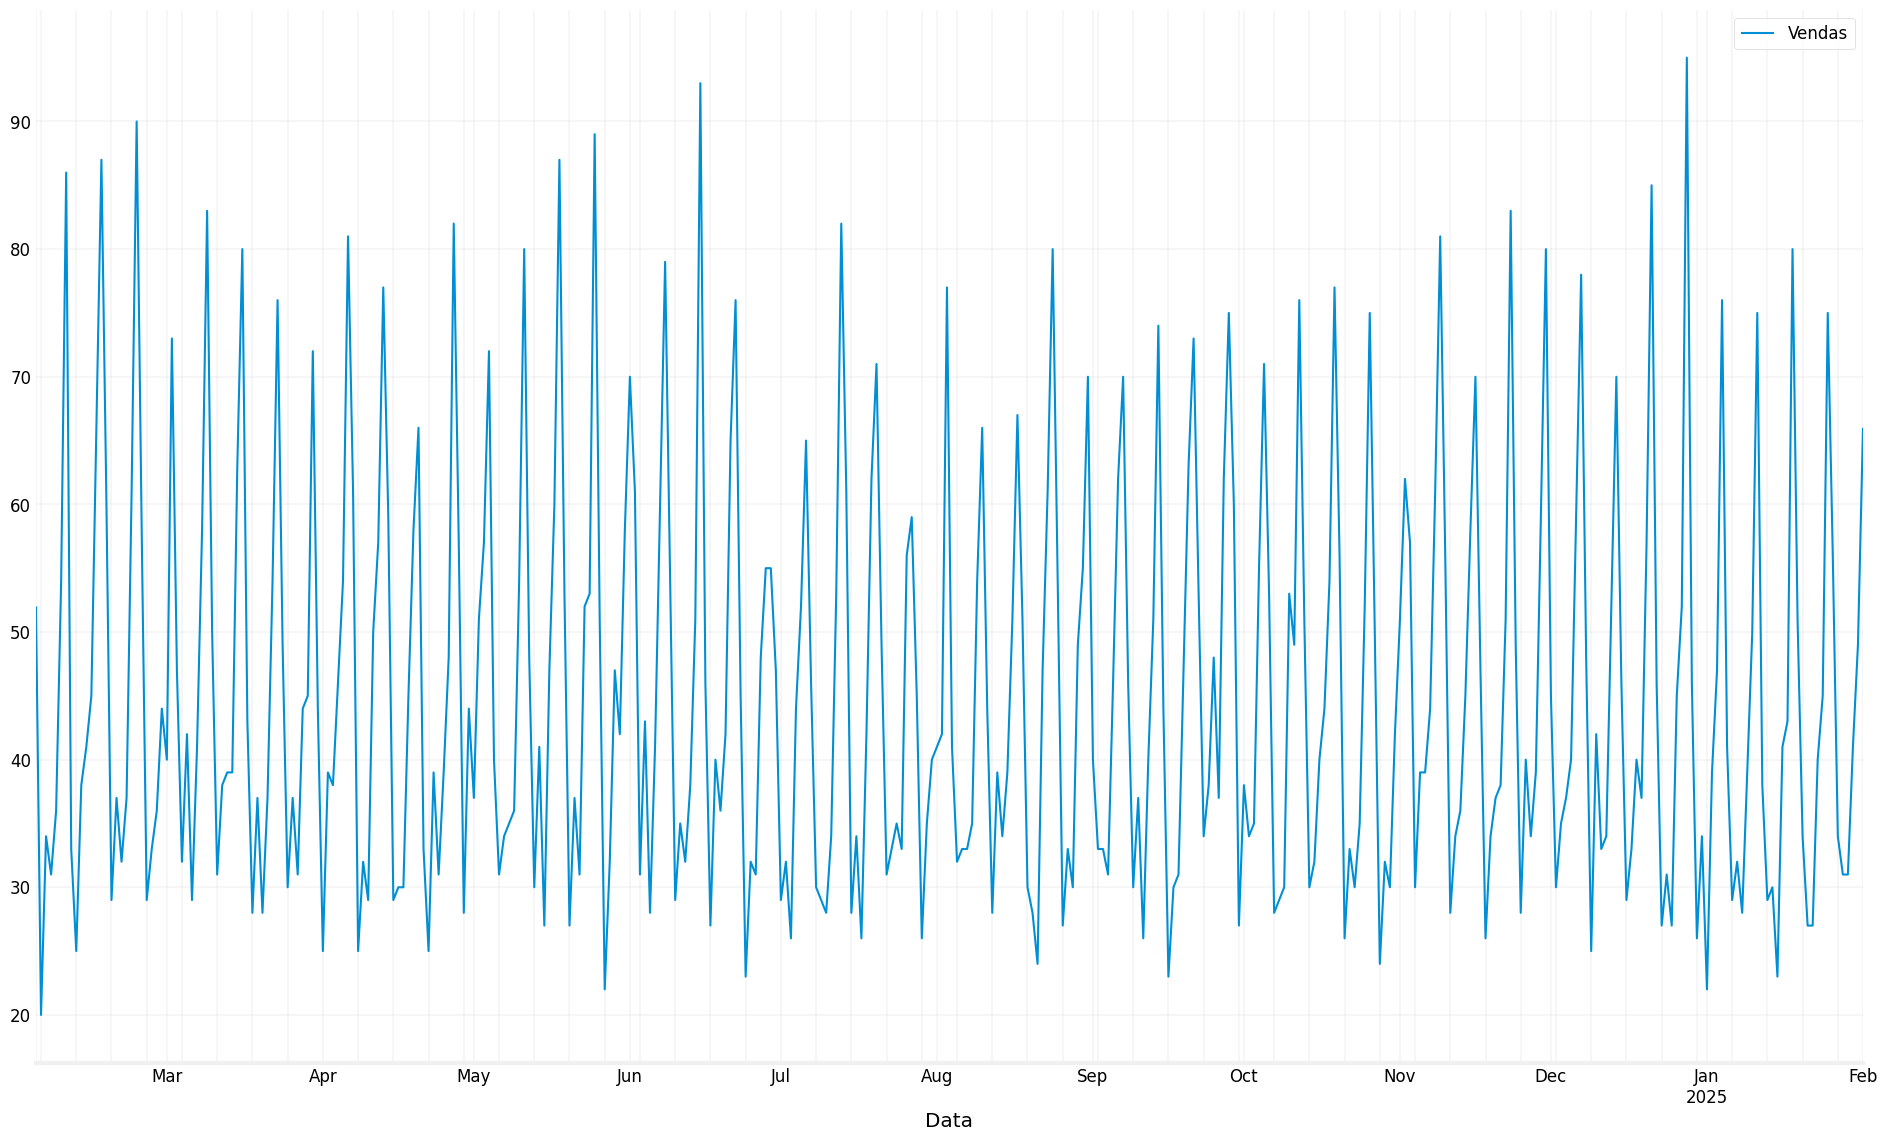

In [6]:
# Gráfico
MinhaSerieTemporal.plot()

#### Decomposição da Série

In [7]:
Decomposicao = seasonal_decompose(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], model = "add", period = 7)

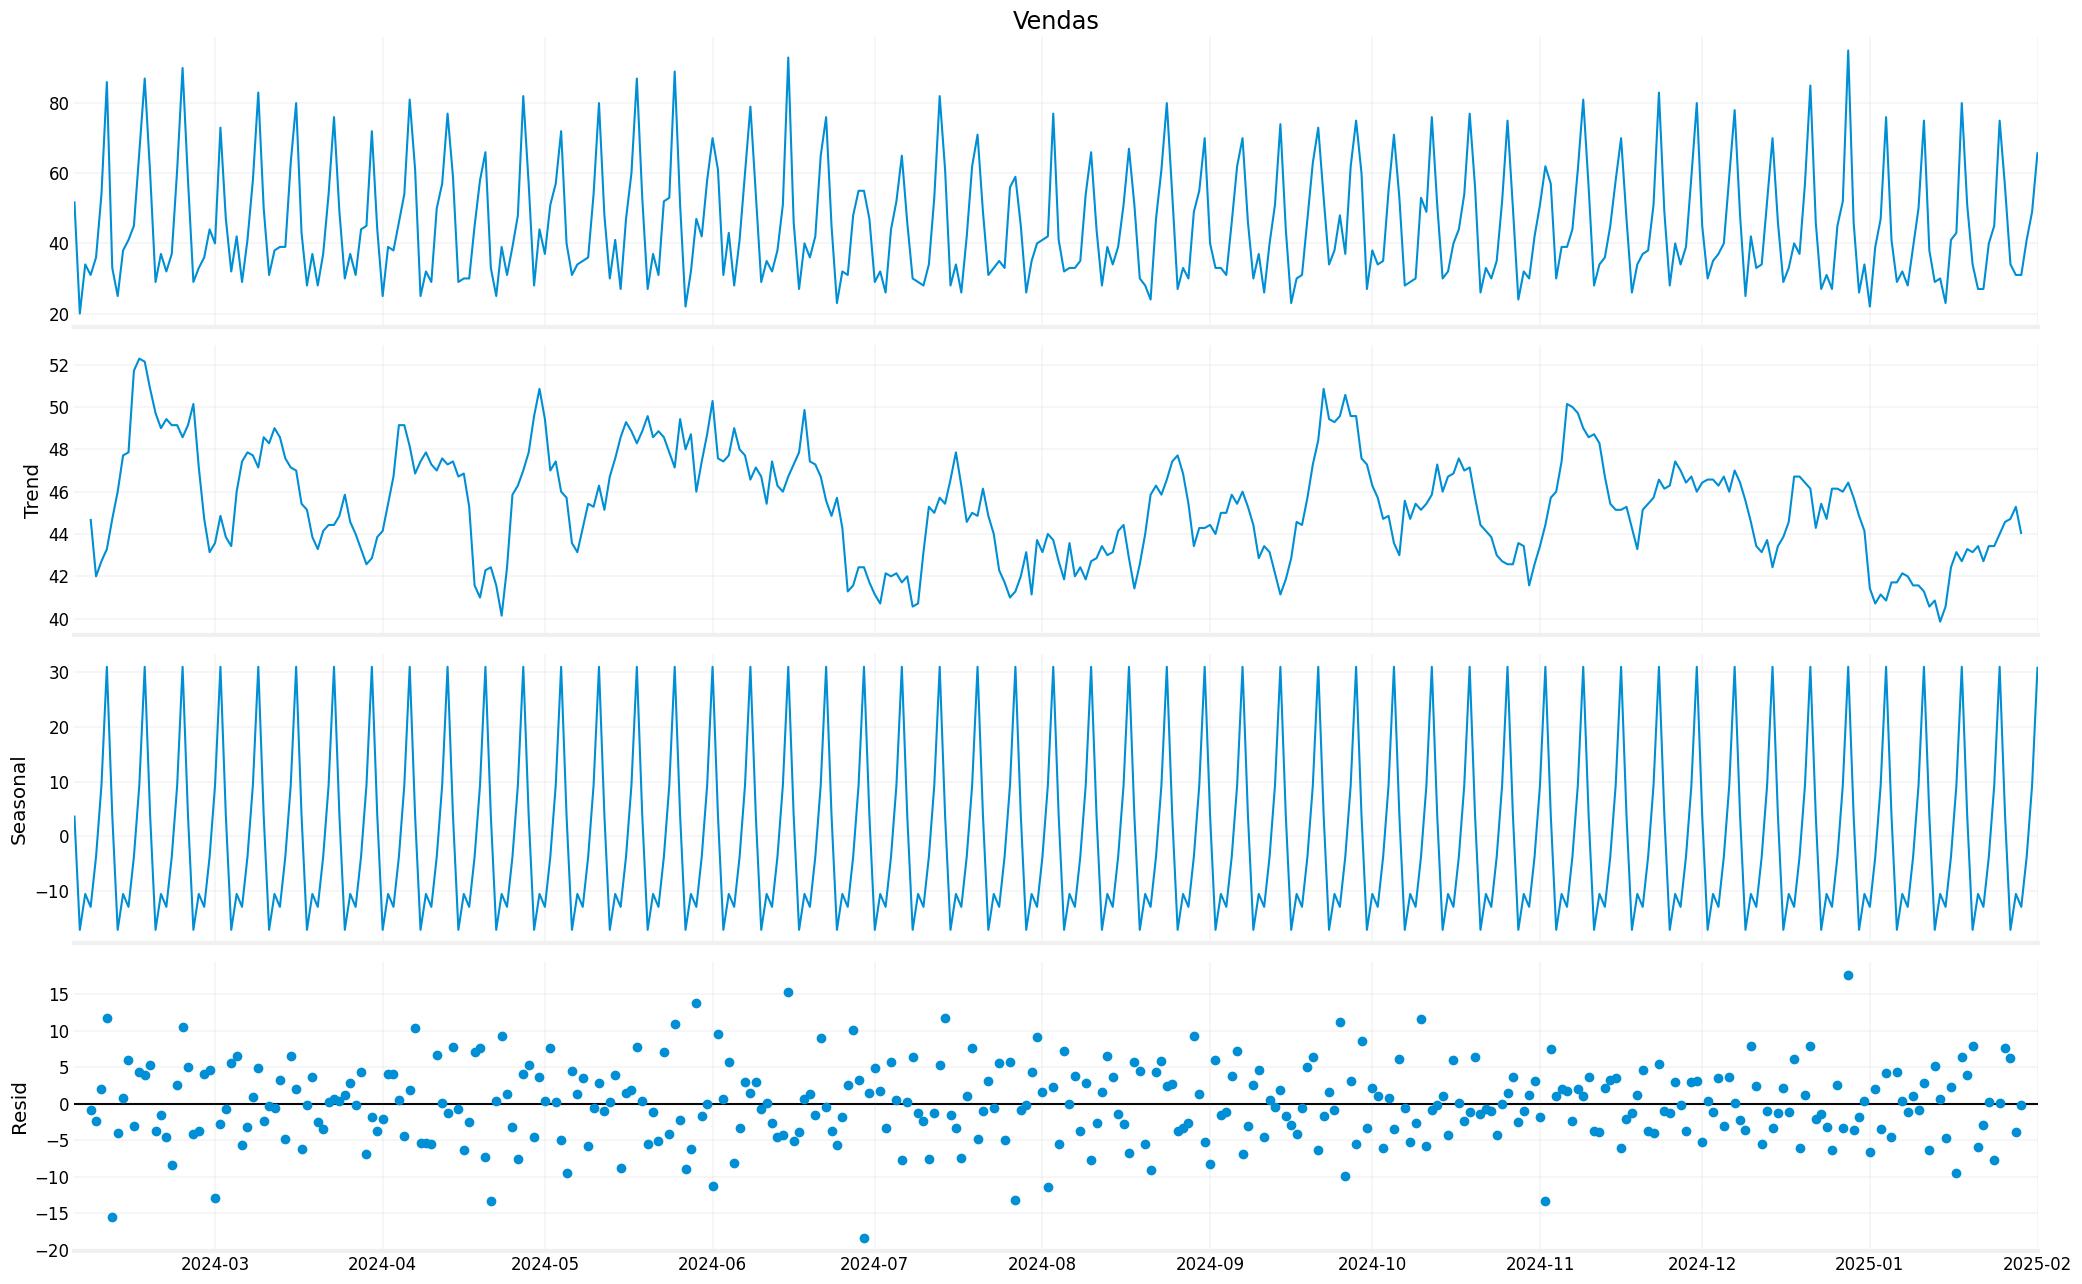

In [8]:
Decomposicao.plot();

#### Teste ADF

In [9]:
ad_fuller_result = adfuller(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.151412985105583
p-value: 0.0007954238372047614


#### Funcão de autocorrelação

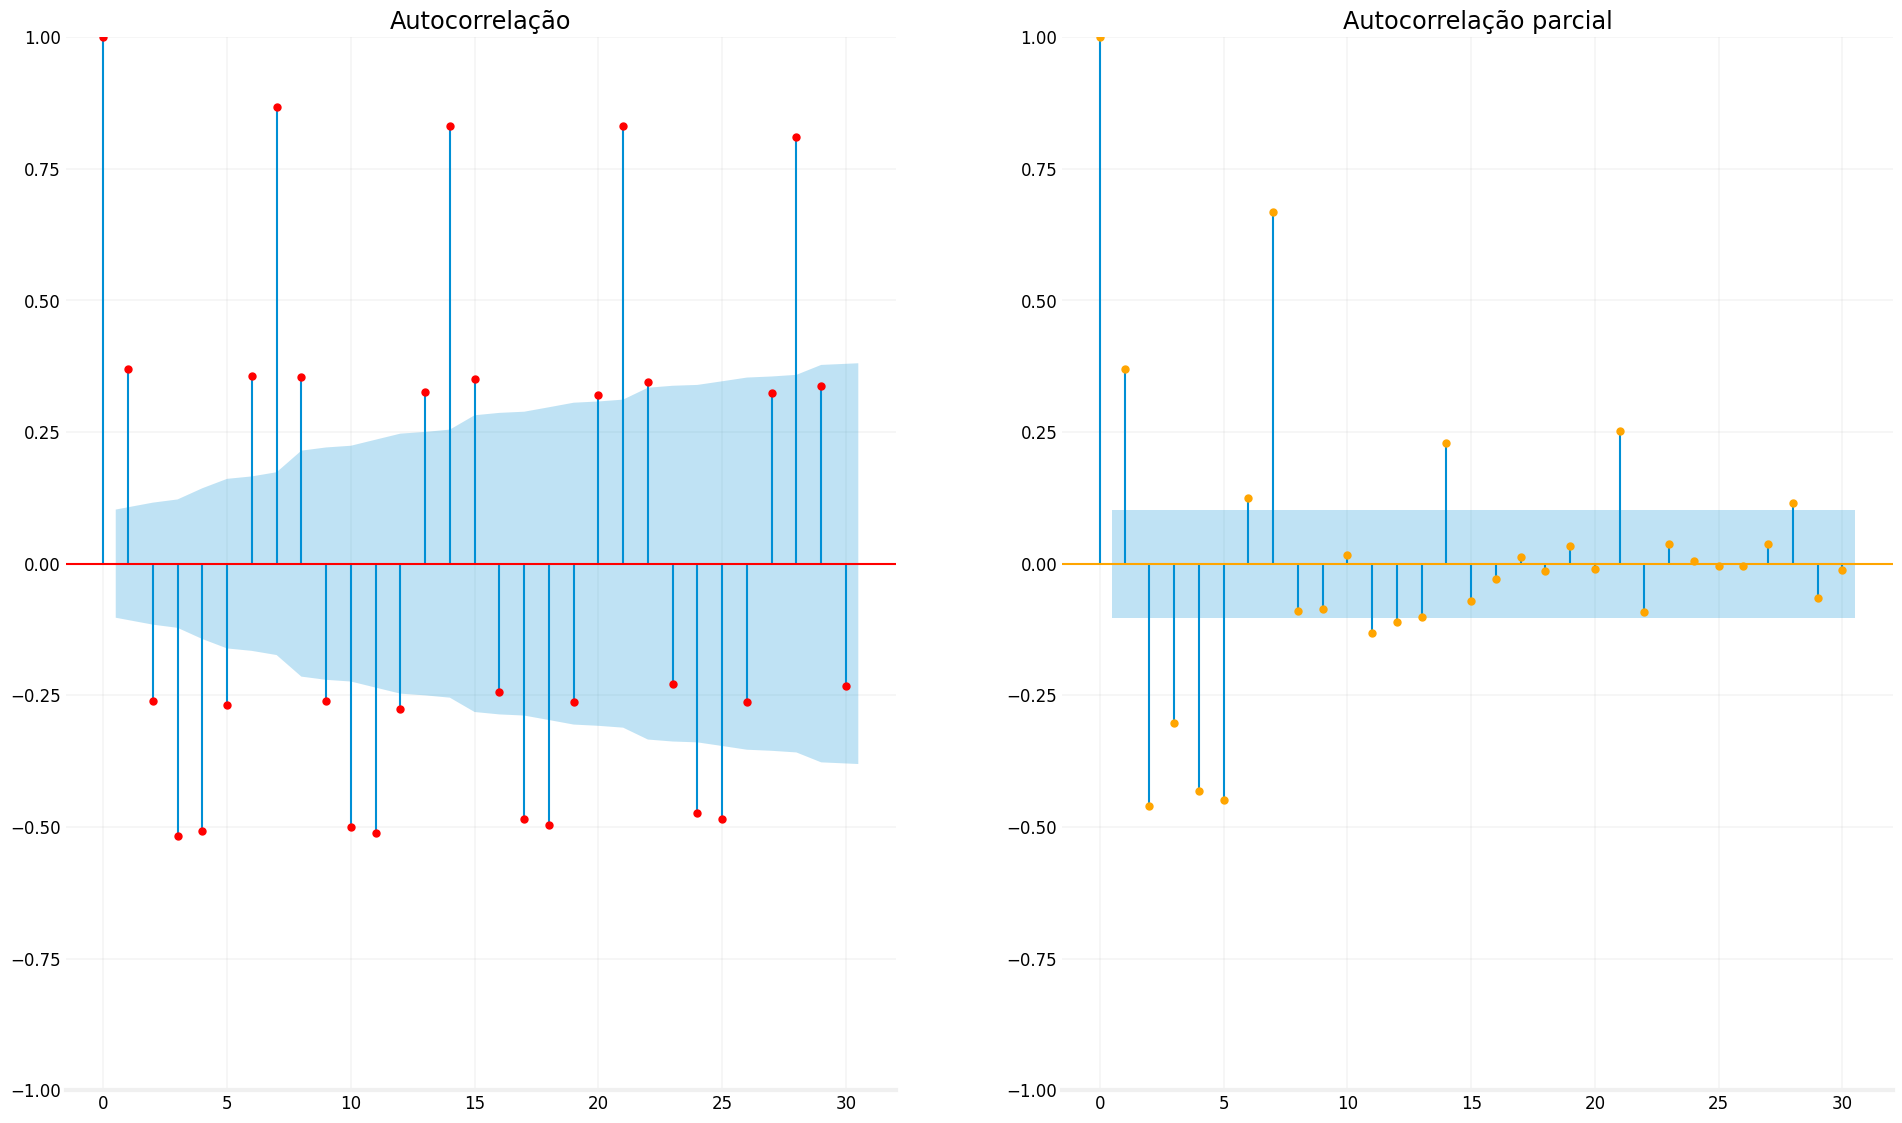

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]],  lags=30, ax=axs[0],color="red")
axs[0].set_title("Autocorrelação");

plot_pacf(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]],  lags=30, ax=axs[1],color="orange")
axs[1].set_title("Autocorrelação parcial")

plt.show();